<a href="https://colab.research.google.com/github/bharaniakella/Ab_torch/blob/main/manipulating_regression_slopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from matplotlib import pyplot as plt

In [ ]:
def create_data(m):
  N=50
  x=torch.randn(N,1)
  y=m*x + torch.randn(N,1)/2

  return x,y

In [ ]:
def create_train_model():
  ann_reg=nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )

  lr=0.05
  loss_fun=nn.MSELoss()
  optimizer=torch.optim.SGD(ann_reg.parameters(),lr=lr)

  numepochs=500
  losses=torch.zeros(numepochs)

  for epochi in range(numepochs):
    yhat=ann_reg(x)
    loss=loss_fun(yhat,y)

    losses[epochi]=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  final_pred=ann_reg(x)
  final_loss=(final_pred-y).pow(2).mean()

  return losses,final_pred



In [ ]:
nexp=50
nslopes=torch.linspace(-2,2,21)


In [ ]:
results=np.zeros((len(nslopes),nexp,2))

for slopei in range(len(nslopes)):
  for expi in range(nexp):
    x,y=create_data(nslopes[slopei])
    losses,final_pred=create_train_model()
    results[slopei,expi,0]=losses[-1]
    results[slopei,expi,1]=np.corrcoef(y.T,final_pred.detach().T)[0,1]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [21]:
results[np.isnan(results)] = 0


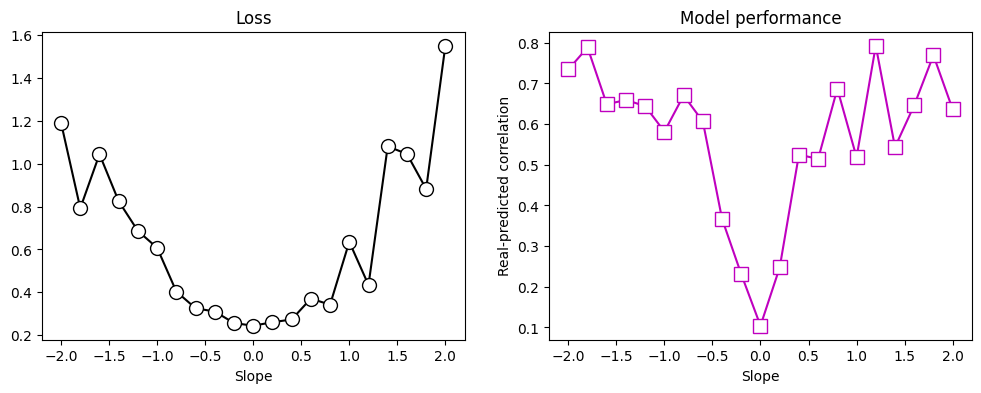

In [20]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(nslopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='w',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(nslopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()